# H&M Personalized fashion recommendation

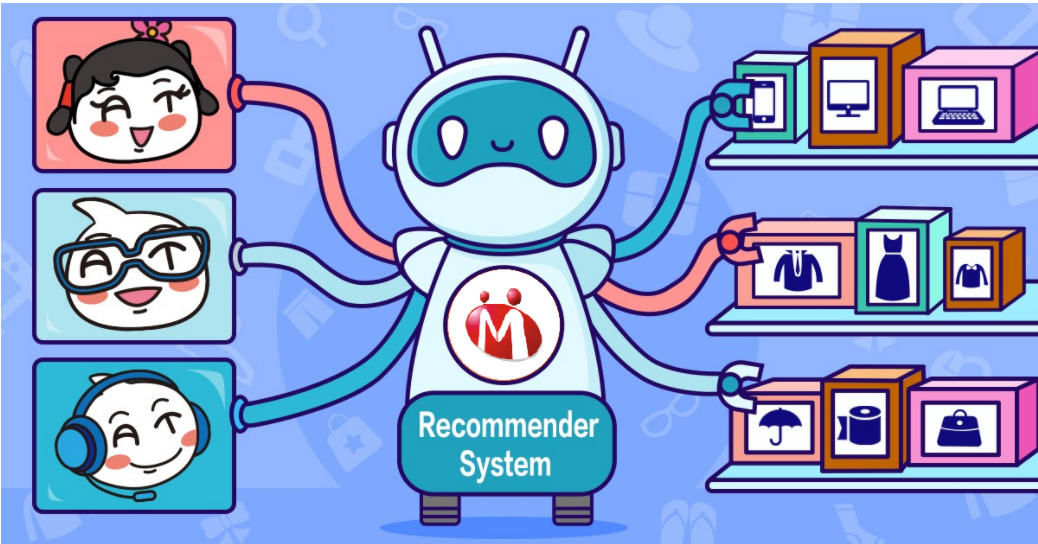

#### images/ 

A folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the article_id; note, not all article_id values have a corresponding image.

#### articles.csv 

Detailed metadata for each article_id available for purchase

#### customers.csv 

Metadata for each customer_id in dataset

#### sample_submission.csv 

A sample submission file in the correct format

#### transactions_train.csv 

The training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.

## Index

* Articles.csv

* Customers.csv
 
* Transactions.csv

* Images and network plots

In [ ]:
# Imports

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import cv2

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# reading the files

articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [ ]:
# Helper plot functions

def plot_value_counts(data,column,p,labels):
    
    age_counts = data[column].value_counts()[p[0]:p[1]]

    fig = px.bar(age_counts,color = age_counts)
    fig.update_layout(
        xaxis_title = labels[0],
        yaxis_title = labels[1],
        title_x = 0.5, 
        showlegend = False,
        
    )
    fig.update_xaxes(tickangle=90)
    fig.show()
    
    
    
    
def plot_wordcloud(data,column):
    
    text = ' '.join(list(data[column]))
    wordcloud = WordCloud().generate(text)
    return wordcloud
    
    

### Looking inside articles.csv

In [ ]:
articles.head()

In [ ]:
# Different product attributes

print(articles.columns)

In [ ]:
# Check no of products and description in articles

print(f'\033[94mNo of products: ',articles.shape[0])
print(f'\033[94mNo of product attributes: ',articles.shape[1])
print("")
print(f'\033[92mNo of different product types: ',len(articles['product_type_name'].unique()))
print(f'\033[92mNo of different product groups: ',len(articles['product_group_name'].unique()))
print(f'\033[92mNo of different color groups: ',len(articles['colour_group_name'].unique()))
print(f'\033[92mNo of different sections in H&M: ',len(articles['section_name'].unique()))
print(f'\033[92mNo of different departments in H&M: ',len(articles['department_name'].unique()))


##### The 15 most available product types available in H&M dataset

In [ ]:
plot_value_counts(articles,'product_type_name',[0,15],["No of items","Product types"])

##### A wordcloud plot of the words in the product description

In [ ]:
text = [x for x in list(articles['detail_desc'])]
text = [str(x) for x in text]
text = ' '.join(text)

wordcloud = WordCloud().generate(text)
    
# Generate plot
                
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Top-15 Product groups in the dataset

In [ ]:
plot_value_counts(articles,'product_group_name',[0,10],["No of items","Product groups"])

##### Top - 15 color groups of products

In [ ]:
plot_value_counts(articles,'colour_group_name',[0,15],["No of items","Product groups"])

We can see that black is by far the most popular color available.

#### Plot for sections available

In [ ]:
plot_value_counts(articles,'section_name',[0,15],["No of items","Section groups"])

#### Plot for departments available

In [ ]:
plot_value_counts(articles,'department_name',[0,15],["No of items","Department groups"])

In [ ]:
# target columns for wordcloud

columns = ['prod_name','product_type_name','product_group_name','colour_group_name','section_name','department_name','index_group_name','section_name','garment_group_name']

In [ ]:
fig = plt.figure(figsize=(25,15))

a,b,c = 4,3,1


for col in columns:
    
    
    wordcloud = plot_wordcloud(articles,col)
    # Generate plot
    plt.subplot(a, b, c)
    plt.title('Case : {}'.format(col))
    c+=1
    plt.imshow(wordcloud)
    plt.axis("off")
    
plt.show()

After products, let's look into the customers dataset

### Customers.csv

In [ ]:
customers.head()

In [ ]:
print(f'\033[94mNo of customers: ',customers.shape[0])
print(f'\033[94mNo of customer attributes: ',customers.shape[1])
print("")
print(f'\033[92mDifferent regions of shoppers: ',len(customers['postal_code'].unique()))

#### Plotting the age-counts of customers

In [ ]:
age_counts = customers["age"].value_counts()

fig = px.bar(age_counts, title="Age of customers")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

**We can see that the 20-30 age groups are the active shoppers**

In [ ]:
print(f'\033[92mMean age of customers: ',customers['age'].mean())
print(f'\033[92mMedian age of customers: ',customers['age'].median())

**So, the most active age group is 20-30.**

#### Plot of club member status of customers

In [ ]:
plot_value_counts(customers,'club_member_status',[0,15],["No of customers","club_member_status"])

#### Plot of customers vs rate of fashion news consumption 

In [ ]:
plot_value_counts(customers,'fashion_news_frequency',[0,15],["No of customers",'fashion_news_frequency'])

#### Plot of age of customers of the respective groups

In [ ]:
customer = customers.dropna()

for val in customer['club_member_status'].unique():
    
    data = customer[customer['club_member_status']==val]
    age_counts = data["age"].value_counts()

    fig = px.bar(age_counts, title="Age of customers with "+str(val)+" club member status")
    fig.update_layout(
        xaxis_title = "Age",
        yaxis_title = "Frequency",
        title_x = 0.5, 
        showlegend = False
    )
    fig.show()

**We can see, age group 20-30 have active club memberships. Whereas, majority of age group 40-60, have not yet taken up club memberships yet.**

#### Plot of age of customers for the columns 'fashion_news_frequency'

In [ ]:
customer = customers.dropna()
customer['fashion_news_frequency'][1356686] = "NONE"

for val in customer['fashion_news_frequency'].unique():
    
    data = customer[customer['fashion_news_frequency']==val]
    age_counts = data["age"].value_counts()

    fig = px.bar(age_counts, title="Age of customers who read fashion news "+str(val)+" ")
    fig.update_layout(
        xaxis_title = "Age",
        yaxis_title = "Frequency",
        title_x = 0.5, 
        showlegend = False
    )
    fig.show()

**We can see, that age graph of customers who read fashion news regularly and have active club memberships are quite similar. Hence we can have a hypothesis that these 2 columns are corelated**

In [ ]:
from scipy.stats import chi2_contingency


CrosstabResult=pd.crosstab(index=customer['club_member_status'],columns=customer['fashion_news_frequency'])
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

**Performing a chi-square test,we can see that,the club_member_status and fashion_news_frequency are heavily co-related.**

### Looking into transactions.csv

In [ ]:
transactions.head()

In [ ]:
# Check no of products and description in articles

print(f'\033[94mNo of transactions: ',transactions.shape[0])
print(f'\033[94mNo of transaction attributes: ',transactions.shape[1])
print("")
print(f'\033[92mTransaction days: ',len(transactions['t_dat'].unique()))
print(f'\033[92mNo of different customers: ',len(transactions['customer_id'].unique()))
print(f'\033[92mNo of different articles sold: ',len(transactions['article_id'].unique()))



#### Plot of transactions over the period

In [ ]:
transactions_date_group = transactions.groupby('t_dat').agg({
    'price':'sum'
})

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=transactions_date_group.index,
                         y=transactions_date_group['price'].round(0),
                         mode='lines',
                         name='Daily Sales'))


fig.update_yaxes(hoverformat="$d")

fig.show()

#### Let's look at the top-15 items sold, over the period

In [ ]:
popular_items = transactions['article_id'].value_counts()[0:15]

print(popular_items.index.tolist())

In [ ]:

print(f'\033[98mThe Top - 15 Products sold')
print('='*60)
for i in popular_items.index.tolist():
    
    prod_name = articles[articles['article_id']==i]['prod_name'].to_string()
    prod_type = articles[articles['article_id']==i]['product_type_name'].to_string()
    
    print(f'\033[93m',' '.join(prod_name.split(' ')[4:]),': ',' '.join(prod_type.split(' ')[4:]))
    

In [ ]:
connected = pd.merge(left=articles, right=transactions, left_on='article_id', right_on='article_id') 

In [ ]:
connected.head()

#### Top product groups sold

In [ ]:
plot_value_counts(connected,'product_group_name',[0,10],["No of items","Product groups"])

#### Top product groups sold

In [ ]:
plot_value_counts(connected,'garment_group_name',[0,10],["No of items","Garment groups"])

#### Most popular sections

In [ ]:
plot_value_counts(connected,'section_name',[0,15],["No of items","Section groups"])

#### Most popular colors among customers

In [ ]:
plot_value_counts(connected,'colour_group_name',[0,15],["No of items","Product groups"])

In [ ]:
popular_customers = transactions['customer_id'].value_counts()[0:15]
#print(popular_items.index.tolist())

print(f'\033[98mThe Top - 15 Customers')
print('='*60)
for i in popular_customers.index.tolist():
    
    prod_name = customers[customers['customer_id']==i]['customer_id'].to_string()
    prod_type = customers[customers['customer_id']==i]['age'].to_string()
    
    print(f'\033[93m',' '.join(prod_name.split(' ')[4:]),': ',' '.join(prod_type.split(' ')[4:]))
    

#### Let's look into the images of the top products sold

In [ ]:
fig = plt.figure(figsize=(25,25))

a,b,c = 3,4,1
base_path = "../input/h-and-m-personalized-fashion-recommendations/images/"

for i in popular_items.index.tolist()[0:10]:
    
    img_path = base_path +  '0' + str(i)[0:2] + '/0' + str(i) + '.jpg'
    
    if(('0' + str(i) + '.jpg') in os.listdir(base_path +  '0' + str(i)[0:2])):
        img = cv2.imread(img_path)
    
    #print(img_path)
        
        plt.subplot(a, b, c)
        plt.title('Article Id : {}'.format(i))
        c+=1
        plt.imshow(img)
        plt.axis("off")
        
    else:
        
        print("Image for id ",i," is not available")
    
        
    
        
    
plt.show()

### Plotting the customer-article network

Here, the green nodes represent the products and blue nodes represent the customers. There exists a path if customer has bought the product.

For this example graph, we are looking into the top 15 customers and the top 25 products.

In [ ]:
cust_nodes = popular_customers.index.tolist()

c_nodes = {}
c = 0
for i in cust_nodes:
    c_nodes[c] = i
    c+=1

p_nodes = {}
c = 0
prod_nodes = transactions['article_id'].value_counts()[0:25].index.to_list()

for i in prod_nodes:
    p_nodes[c] = i
    c+=1

In [ ]:
G = nx.Graph()
pos=nx.spring_layout(G)

color_map = []



G.add_nodes_from(list(c_nodes.keys()))


G.add_nodes_from(list(p_nodes.keys()))

for node in range(len(G.nodes())):
    if node < 16:
        color_map.append('blue')
    else: 
        color_map.append('green') 
        

for cust in cust_nodes:
    
    dat = transactions[transactions['customer_id']==cust]
    prods = list(dat['article_id'].unique())
    for p in prod_nodes:
        
        if p in prods:
            G.add_edge(cust_nodes.index(cust),prod_nodes.index(p))
            



nx.draw_random(G,node_color=color_map,with_labels=True)



    

**Here, the green nodes represent the products and blue nodes represent the customers. There exists a path if customer has bought the product.**

**For this example graph, we are looking into the top 15 customers and the top 25 products.**

We can use graph based recommendation engine model, as a baseline for this competition

#### Acknowledgements

* https://plotly.com/python/
* https://networkx.org/documentation/stable/tutorial.html

Hope you liked the notebook !!

All suggestions welcomed :)